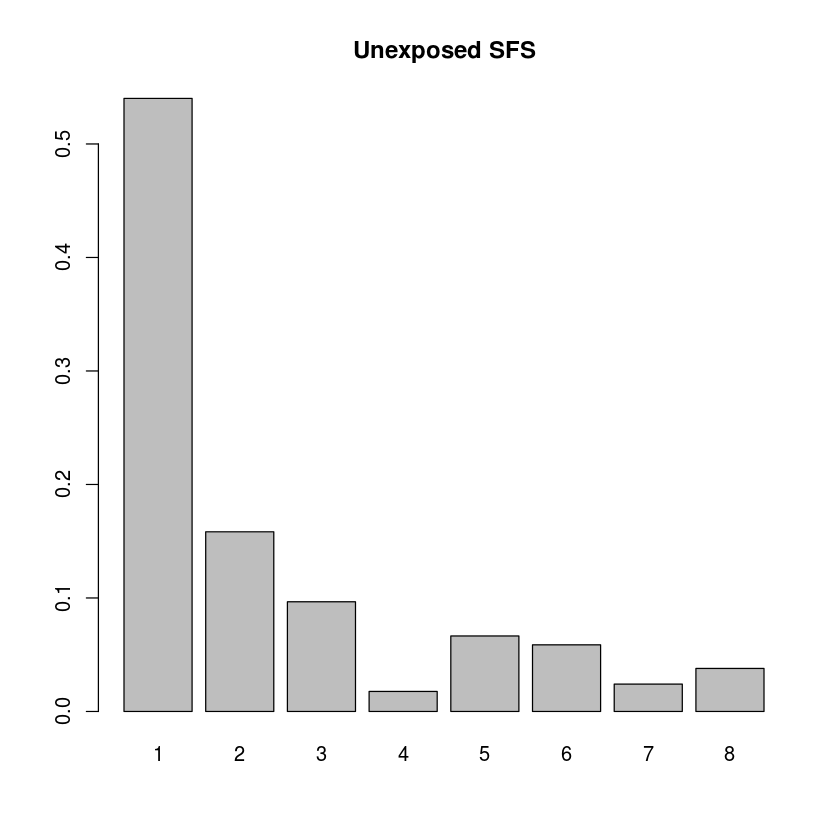

In [1]:
s<-scan('~/WGS/SNPS/12_07/Pairedplus_U_sub.sfs')
s<-s[-c(1,length(s))]
s<-s/sum(s)
barplot(s,names=1:length(s),main='Unexposed SFS')

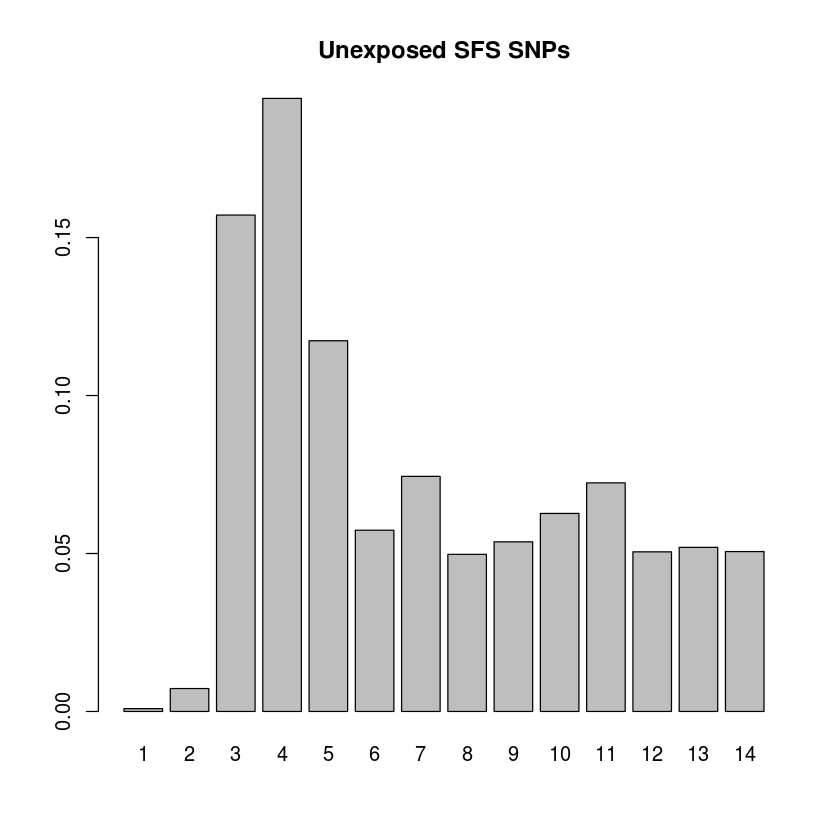

In [1]:
s<-scan('~/WGS/SNPS/12_07/Pairedplus_U_SNPS.sfs')
s<-s[-c(1,length(s))]
s<-s/sum(s)
barplot(s,names=1:length(s),main='Unexposed SFS SNPs')

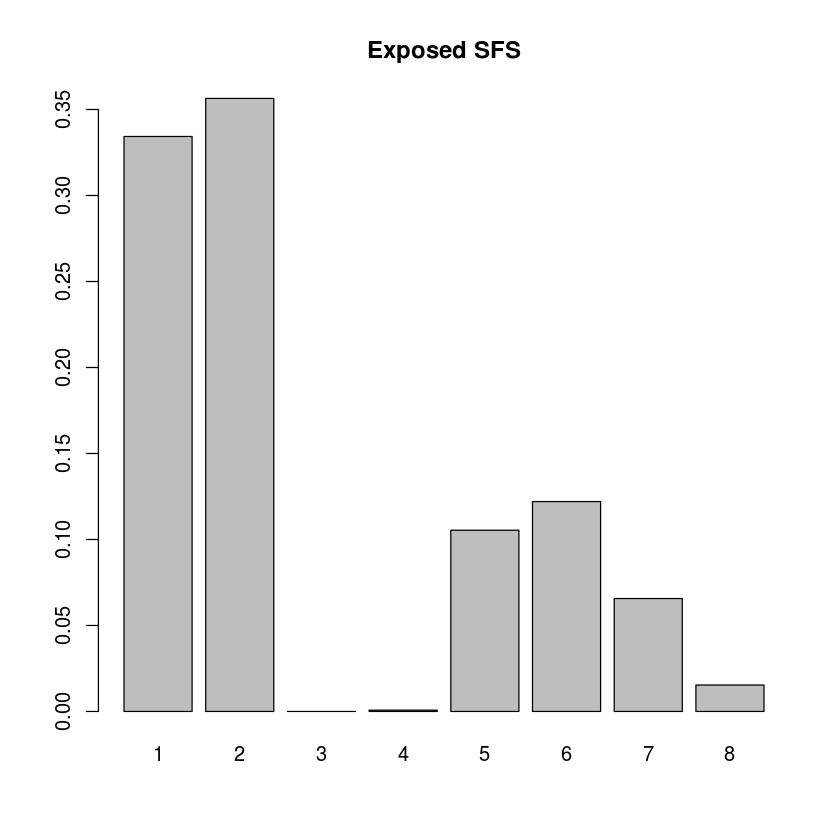

In [92]:
s<-scan('~/WGS/SNPS/12_07/Pairedplus_E_SNPS.sfs')
s<-s[-c(1,length(s))]
s<-s/sum(s)
barplot(s,names=1:length(s),main='Exposed SFS')

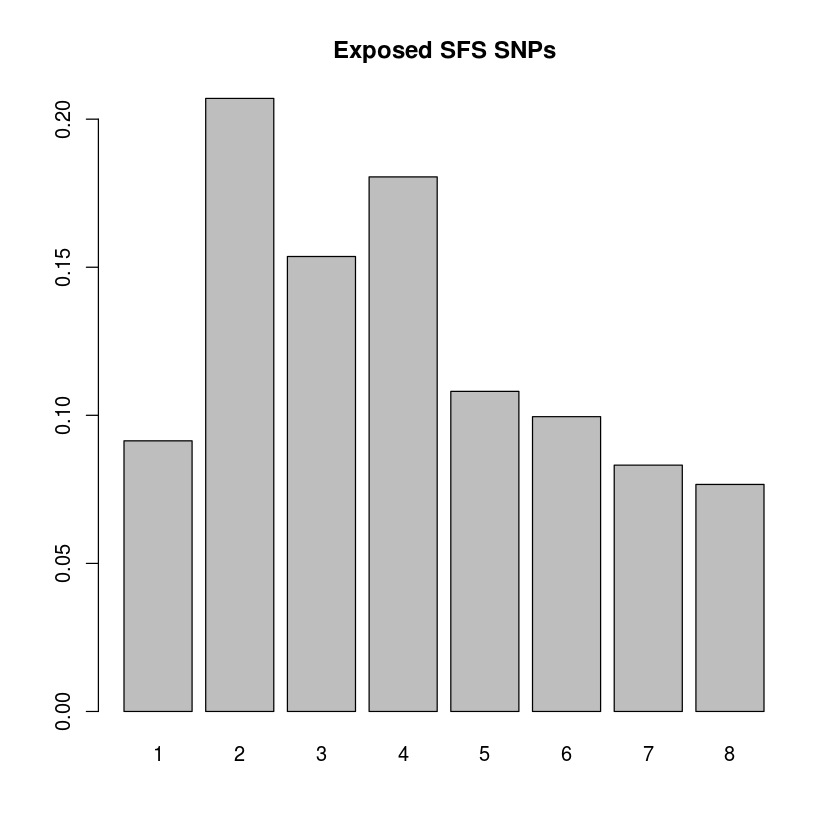

In [2]:
s<-scan('~/WGS/SNPS/12_07/Pairedplus_E_SNPS.sfs')
s<-s[-c(1,length(s))]
s<-s/sum(s)
barplot(s,names=1:length(s),main='Exposed SFS SNPs')

In [1]:
setwd("~/WGS/SNPS/12_07/")

In [24]:
DE=read.table("TDscafE.txt", row.names=NULL, header=TRUE)

In [25]:
head(DE)

Chr,tW,Tajima
GL429767,650623.5,-0.337186
GL429768,397450.7,-0.326690
GL429769,244161.1,-0.552167
GL429770,319974.4,-0.301578
GL429771,154016.4,-0.547457
GL429772,211129.7,-0.322585


In [26]:
DE=as.data.frame(DE)

In [28]:
DE$tW=as.numeric(DE$tW)

In [31]:
DE$Tajima=as.numeric(DE$Tajima)

In [47]:
tail(DE)

,Chr,tW,Tajima
11572,AAPE02072779,8.824664,-0.419372
11573,AAPE02072780,17.028981,-0.271876
11574,AAPE02072781,2.707712,-0.245921
11575,AAPE02072782,0.862102,-0.281641
11576,AAPE02072783,7.497977,-0.328476
11577,AAPE02072784,6.053677,-0.358197


In [49]:
NROW(DE)

[1] 11577

In [37]:
DU=read.table("TDscafU.txt", row.names=NULL, header=TRUE)

In [38]:
head(DU)

Chr,tW,Tajima
GL429767,1054239.3,-0.820360
GL429768,645591.5,-0.805110
GL429769,432684.6,-1.084697
GL429770,515741.1,-0.768695
GL429771,282745.5,-1.079197
GL429772,341631.6,-0.799158


In [39]:
DU=as.data.frame(DU)

In [40]:
DU$Tajima=as.numeric(DU$Tajima)

In [41]:
DU$tW=as.numeric(DU$tW)

In [48]:
NROW(DU)

[1] 11654

In [51]:
TDAll=merge(DU, DE, by="Chr")

In [54]:
head(TDAll)

Scaf,tWU,TajimaU,tWE,TajimaE
AAPE02055386,1555.0468,-0.978124,419.2010,-0.399650
AAPE02055720,1654.3820,-0.381674,547.3936,-0.435630
AAPE02055947,1131.7868,-1.229909,229.8793,-0.354490
AAPE02056334,1738.3224,-0.541796,442.9160,-0.233337
AAPE02056387,860.4974,-1.277498,168.3766,-0.369802
AAPE02056710,761.1079,-0.679052,463.1130,-0.468362


In [53]:
colnames(TDAll)=c("Scaf", "tWU", "TajimaU", "tWE", "TajimaE")

In [92]:
TDAll$Dif=TDAll$TajimaE-TDAll$TajimaU

In [93]:
TDAll=as.data.frame(TDAll)

In [94]:
TDAll$Dif=as.numeric(TDAll$Dif)

In [95]:
head(TDAll)

Scaf,tWU,TajimaU,tWE,TajimaE,Dif
AAPE02055386,1555.0468,-0.978124,419.2010,-0.399650,0.578474
AAPE02055720,1654.3820,-0.381674,547.3936,-0.435630,-0.053956
AAPE02055947,1131.7868,-1.229909,229.8793,-0.354490,0.875419
AAPE02056334,1738.3224,-0.541796,442.9160,-0.233337,0.308459
AAPE02056387,860.4974,-1.277498,168.3766,-0.369802,0.907696
AAPE02056710,761.1079,-0.679052,463.1130,-0.468362,0.210690


In [96]:
TDAlllow=TDAll[TDAll$Dif< -1,]

In [97]:
head(TDAlllow)

,Scaf,tWU,TajimaU,tWE,TajimaE,Dif
6660,AAPE02071107,32.85856,1.128382,16.4622,-0.444825,-1.573207
7533,AAPE02072036,59.93608,0.593493,44.6737,-0.537620,-1.131113


It's hard to compare them since the sample sizes are so different. I could randomly subset 9 of the unexposed samples and then re-calculate? I don't think this will make a difference in terms of negative vs positive values though...

In [66]:
require(ggplot2)

In [98]:
plot=ggplot(data=TDAll, aes(x=TajimaU, y=Dif))+
  geom_point(data=TDAll, stat="identity")+
  theme_bw()+ylab("Change in Tajima's D Unexposed to Exposed")+
xlab("Tajima's D Unexposed")+
  theme(axis.text.x = NULL)

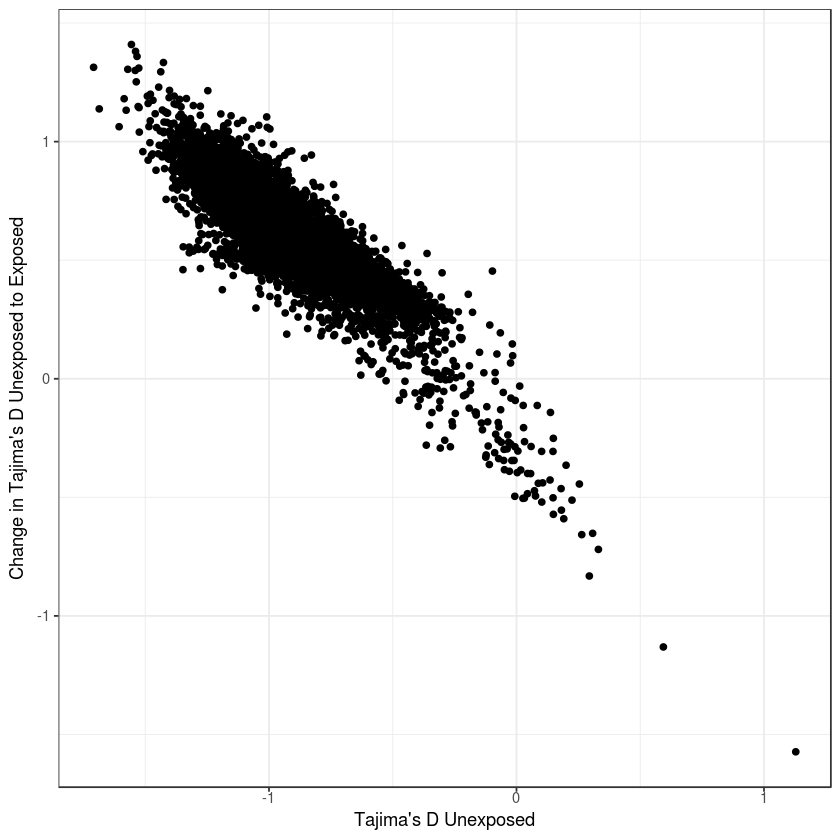

In [99]:
plot

In [133]:
plot=ggplot(data=TDAll, aes(x=Scaf, y=Dif))+
ggtitle("Increase in Tajima's D")+
geom_point(data=TDAll, stat="identity", aes(colour = Dif >0))+
theme_bw()+theme(axis.text.x=element_blank(), plot.title = element_text(hjust = 0.5))+ylab("Change in Tajima's D Unexposed to Exposed")+
xlab("Scaffold")+scale_color_manual(values=c("aquamarine2", "blue"))

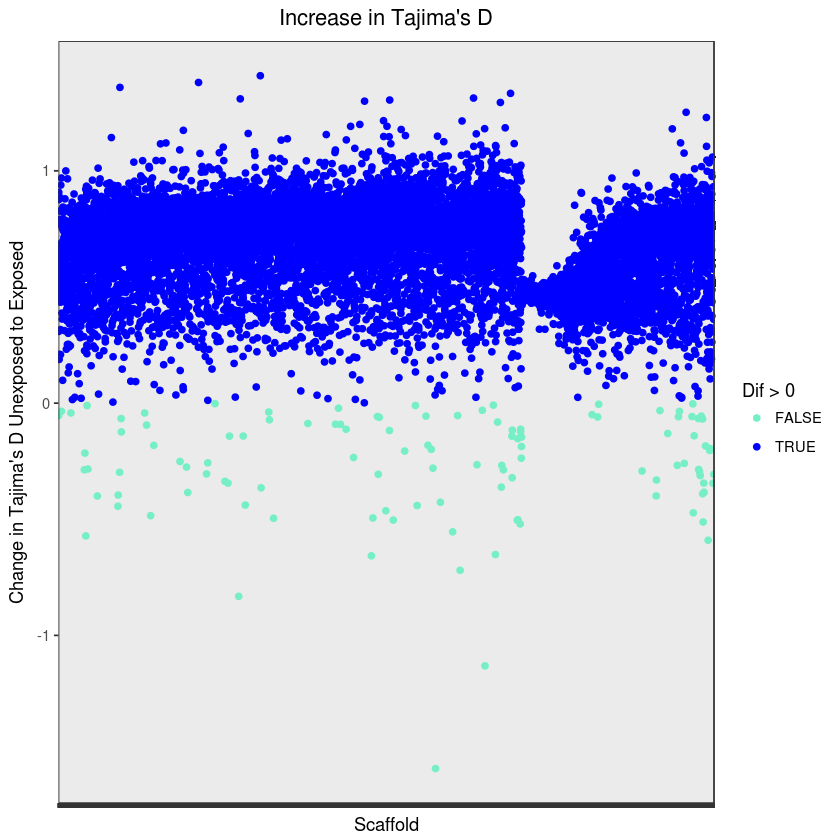

In [134]:
plot

In [33]:
plot=ggplot(data=DE, aes(x=Chr, y=Tajima))+
  geom_point(data=DE, stat="identity")+
  theme_bw()+ylab("Tajima's D")+
xlab("Scaffold")+
  theme(axis.text.x = NULL)

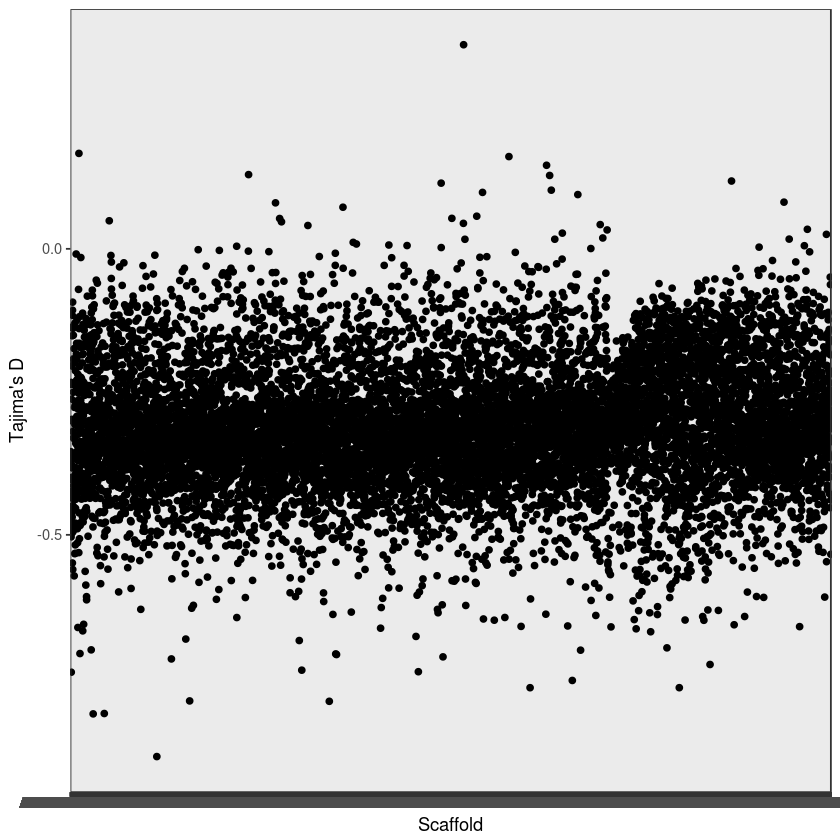

In [34]:
plot

In [43]:
plot=ggplot(data=DU, aes(x=Chr, y=Tajima))+
  geom_point(data=DU, stat="identity")+
  theme_bw()+ylab("Tajima's D")+
xlab("Scaffold")+
  theme(axis.text.x = NULL)

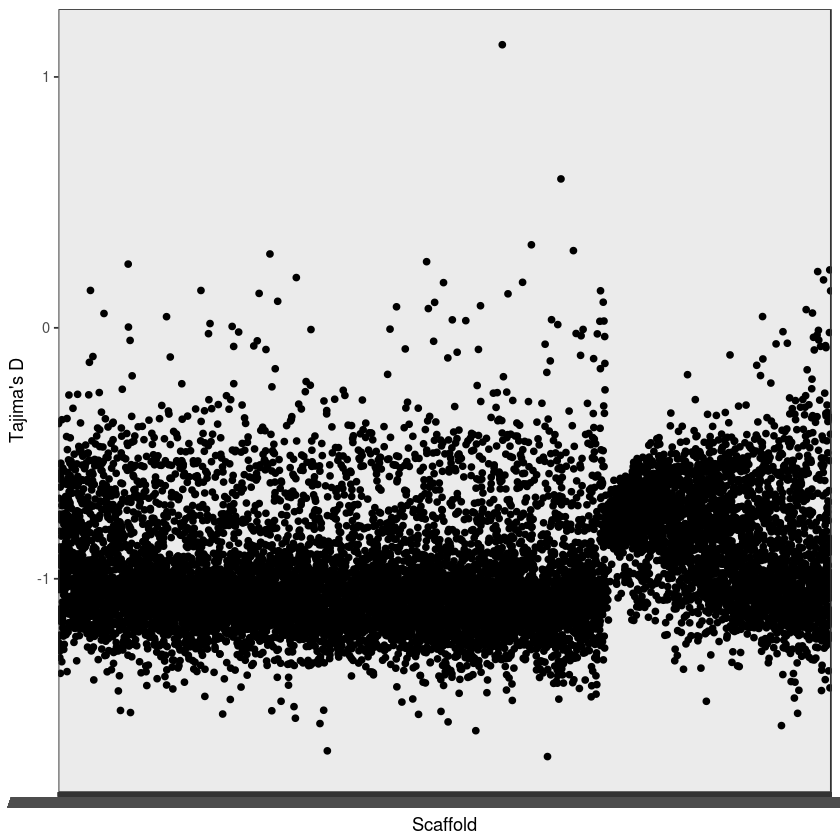

In [44]:
plot

In [35]:
 plot=ggplot(data=DE, aes(x=Chr, y=tW))+
  geom_point(data=DE, stat="identity")+
  theme_bw()+ylab("Theta")+
xlab("Scaffold")+
  theme(axis.text.x = NULL)

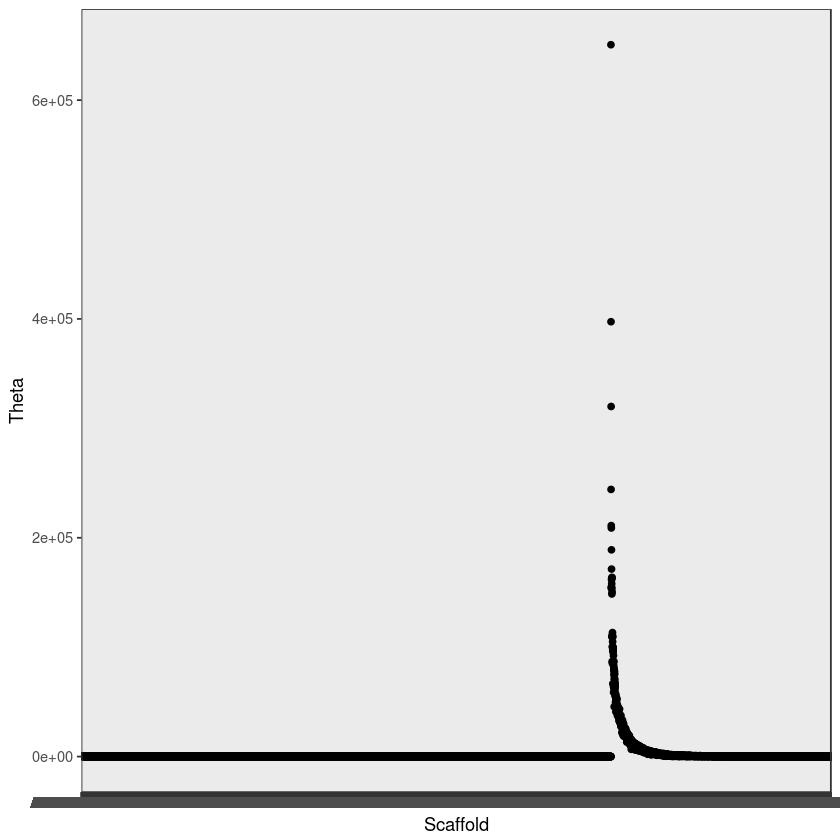

In [36]:
plot

In [45]:
 plot=ggplot(data=DU, aes(x=Chr, y=tW))+
  geom_point(data=DU, stat="identity")+
  theme_bw()+ylab("Theta")+
xlab("Scaffold")+
  theme(axis.text.x = NULL)

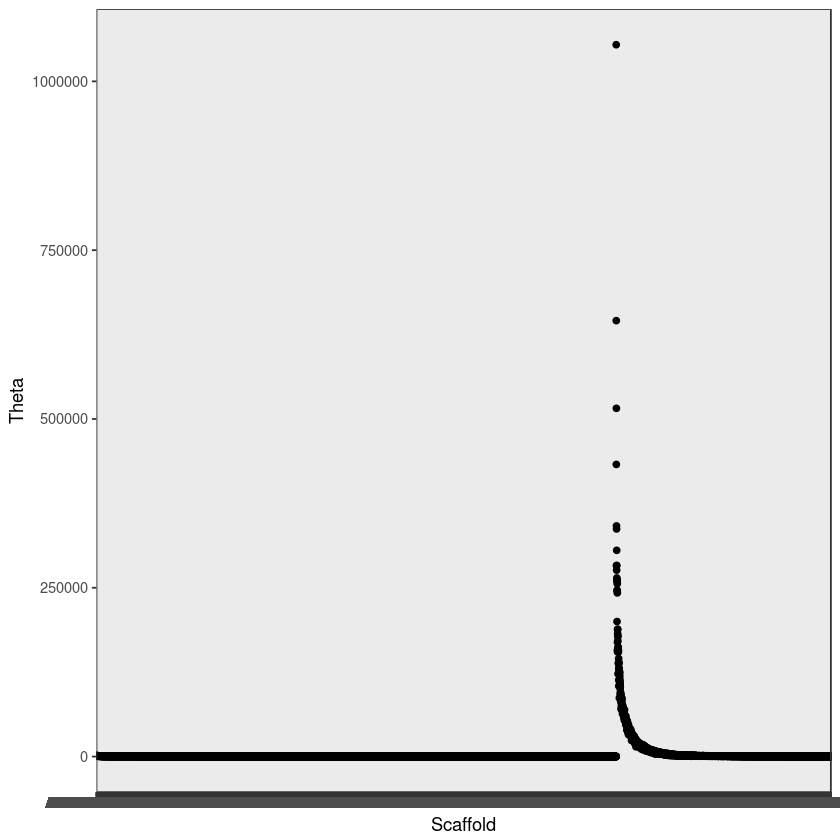

In [46]:
plot